In [1]:
from recommendation_engine import Movie_recomendation_system,Recommendation_tools

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random

In [3]:
user_preference = Movie_recomendation_system.get_user_preference()

#### A benchmark of the time taken to make movie recommmendations

In [4]:
%%time
Movie_recomendation_system.automatic_recommendation(user_preference,12)

Wall time: 3.5 s


['Fugitive, The (1993)',
 'Usual Suspects, The (1995)',
 'Quiz Show (1994)',
 'Stand by Me (1986)',
 'Empire Strikes Back, The (1980)',
 'Field of Dreams (1989)',
 'Terminator 2: Judgment Day (1991)',
 'Pulp Fiction (1994)',
 'Shawshank Redemption, The (1994)',
 'Heat (1995)',
 'Princess Bride, The (1987)',
 'Return of the Jedi (1983)',
 'Star Wars (1977)',
 'Seven (Se7en) (1995)',
 'E.T. the Extra-Terrestrial (1982)',
 'Toy Story (1995)',
 'Four Weddings and a Funeral (1994)',
 'Hunt for Red October, The (1990)',
 'Beauty and the Beast (1991)',
 'Rock, The (1996)',
 'Maverick (1994)',
 'Jaws (1975)',
 'Birdcage, The (1996)',
 'Firm, The (1993)',
 'Clueless (1995)',
 'Lion King, The (1994)',
 'Terminator, The (1984)',
 'Jerry Maguire (1996)',
 'Indiana Jones and the Last Crusade (1989)',
 'Groundhog Day (1993)',
 'Jurassic Park (1993)',
 'Aliens (1986)',
 'Independence Day (ID4) (1996)',
 'Godfather, The (1972)',
 'Star Trek: The Wrath of Khan (1982)',
 'Monty Python and the Holy Grail

In [5]:
%%time
Movie_recomendation_system.automatic_recommendation(user_preference,2)

Wall time: 1.95 s


['Celluloid Closet, The (1995)',
 'Richard III (1995)',
 'Crash (1996)',
 'Big Night (1996)',
 'In the Company of Men (1997)',
 'Mystery Science Theater 3000: The Movie (1996)',
 'Mulholland Falls (1996)',
 'Kids in the Hall: Brain Candy (1996)',
 'Toy Story (1995)',
 'Jerry Maguire (1996)',
 'Air Force One (1997)',
 'Contact (1997)',
 'Game, The (1997)',
 'Twelve Monkeys (1995)',
 'Full Monty, The (1997)',
 'Trainspotting (1996)',
 'Return of the Jedi (1983)',
 'Birdcage, The (1996)',
 "Mr. Holland's Opus (1995)",
 'Scream (1996)',
 'Conspiracy Theory (1997)',
 'Men in Black (1997)',
 'In & Out (1997)',
 "My Best Friend's Wedding (1997)",
 'Time to Kill, A (1996)',
 'Independence Day (ID4) (1996)',
 'People vs. Larry Flynt, The (1996)',
 'Star Trek: First Contact (1996)',
 'English Patient, The (1996)',
 'Wag the Dog (1997)',
 'Amistad (1997)',
 'Apt Pupil (1998)',
 'Apostle, The (1997)',
 'Man Who Knew Too Little, The (1997)',
 'Tomorrow Never Dies (1997)',
 'Midnight in the Garden o

### Result :

#### **This shows that the model with scale well in production with a peak time of  3.5 s for prediction** 

#### **This time is fairly constant regardless of the number of movies watched by the user** 

## Evaluating the recommendation system


### dropping duplicates to avoid data leakage

In [6]:
user_preference = user_preference.drop_duplicates(subset =  ['user_id','movie_title']).reset_index()

### splitting the dataset into train and test set using a ration of 70 : 30

In [7]:
data_length = len(user_preference)
train_size =  int(0.7 * data_length)
test_size =  data_length - train_size

In [8]:
train_set = user_preference.sample(n = train_size,random_state=42)
train_index = train_set.index
test_index = [index for index in user_preference.index if index not in train_index]
test_set = user_preference.loc[test_index]

In [9]:
def prediction_single_user(train_set,test_set,user_id,min_rating = 4,metric_to_use = 'cosine'):
    '''
    prediction using the automatic_rocommendation
    '''
    # THis generates a list of movies that the user has watched in the the test set with a rating of at least 4
    ground_truth = test_set[(test_set.user_id == user_id) & (test_set.rating >=min_rating)].movie_title.to_list()
    # Generates similar movies to the user's favorite movie
    prediction = Movie_recomendation_system.automatic_recommendation(train_set,user_id,metric_to_use )
    # Generates a list of predicted movies that are in the ground truth 
    correct_prediction = [x for x in prediction if x in ground_truth ]
    
    # returns the accuracy of predicted results to the ground truth 
    try :
        automatic_recommendation  = len(correct_prediction)/len(ground_truth)
    except ZeroDivisionError:
        automatic_recommendation = 0
   
    return automatic_recommendation

### Generates the accuracy of prediction for 30 users in the test set

In [10]:
%%time
index_to_use = test_set.user_id.unique()
metrics = ['cosine','correlation']
accuracy = [[prediction_single_user(train_set,test_set,user_id,min_rating = 4,metric_to_use = metric) for user_id in index_to_use[:30]] for metric in metrics ]

Wall time: 2min 32s


In [11]:
accuracy_data = pd.DataFrame(np.array(accuracy).T,columns = metrics)
accuracy_data

,cosine,correlation
0,0.764706,0.764706
1,0.757576,0.727273
2,0.200000,0.066667
3,0.506494,0.467532
4,0.400000,0.200000
5,0.481481,0.462963
6,0.500000,0.473684
7,0.288889,0.266667
8,0.777778,0.555556
9,0.181818,0.181818


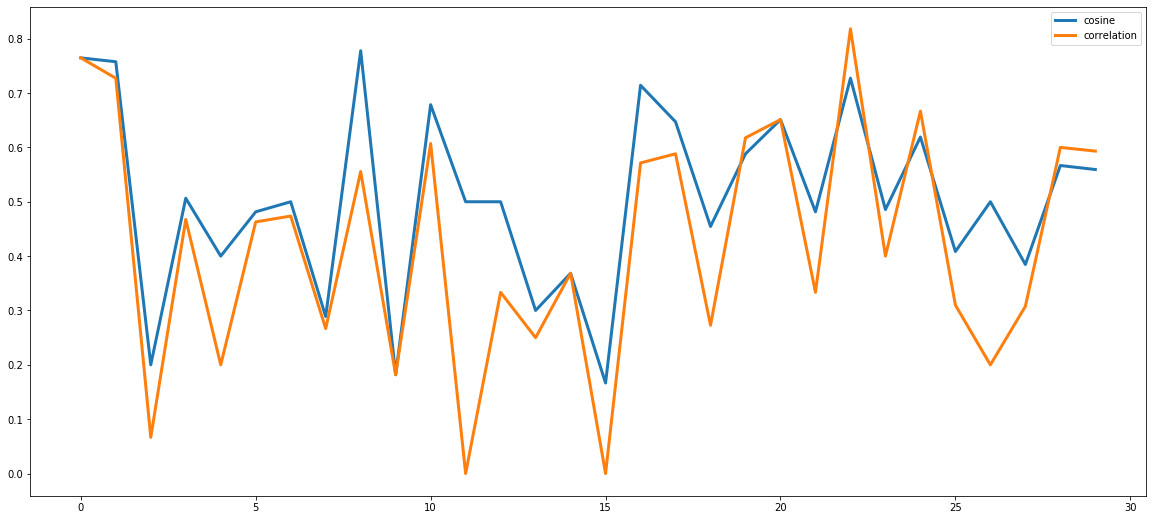

In [12]:
accuracy_data.plot(figsize = (20,9),lw=3)

### Generates a plot of the weighted accuracy across each metric for the test set

In [13]:
accuracy_data.mean()

cosine         0.505342
correlation    0.421864
dtype: float64

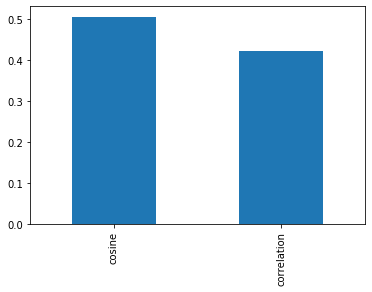

In [14]:
accuracy_data.mean().plot(kind  = 'bar')

#### **The metric with the higest accuracy is the cosine metric** 

#### A benchmark of the time taken to make movie recommmendations

In [15]:
%%time
prediction_single_user(train_set,test_set,1,min_rating =4,metric_to_use = 'cosine')

Wall time: 3.32 s


0.4489795918367347

In [16]:
%%time
prediction_single_user(train_set,test_set,2,min_rating =4,metric_to_use = 'cosine')

Wall time: 1.53 s


0.7777777777777778

In [17]:
%%time
prediction_single_user(train_set,test_set,23,min_rating =4,metric_to_use = 'cosine')

Wall time: 2.6 s


0.42857142857142855

In [18]:
%%time
prediction_single_user(train_set,test_set,120,min_rating =4,metric_to_use = 'cosine')

Wall time: 708 ms


0.5

In [19]:
%%time
prediction_single_user(train_set,test_set,911,min_rating =4,metric_to_use = 'cosine')

Wall time: 2.23 s


0.6923076923076923

In [20]:
%%time
Movie_recomendation_system.automatic_recommendation(user_preference,1)

Wall time: 3.35 s


['Glory (1989)',
 'Sneakers (1992)',
 'When Harry Met Sally... (1989)',
 'E.T. the Extra-Terrestrial (1982)',
 'Braveheart (1995)',
 'Speed (1994)',
 'Empire Strikes Back, The (1980)',
 'Stand by Me (1986)',
 'Hoop Dreams (1994)',
 'Sleepless in Seattle (1993)',
 'Back to the Future (1985)',
 'Princess Bride, The (1987)',
 'Jerry Maguire (1996)',
 'Fugitive, The (1993)',
 'Blues Brothers, The (1980)',
 'Forrest Gump (1994)',
 'Lion King, The (1994)',
 'Return of the Jedi (1983)',
 'Star Wars (1977)',
 'Apollo 13 (1995)',
 'Full Metal Jacket (1987)',
 'Monty Python and the Holy Grail (1974)',
 'Fish Called Wanda, A (1988)',
 'Outbreak (1995)',
 'Othello (1995)',
 "One Flew Over the Cuckoo's Nest (1975)",
 'One Fine Day (1996)',
 'On Golden Pond (1981)',
 'Omen, The (1976)',
 'Old Yeller (1957)',
 'Quiz Show (1994)',
 'Clueless (1995)',
 'Hunt for Red October, The (1990)',
 'Indiana Jones and the Last Crusade (1989)',
 'Much Ado About Nothing (1993)',
 'Dave (1993)',
 'Highlander (1986)'